In [1]:
# from google.colab import files
# files.upload()  # Upload kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c playground-series-s5e8

In [2]:
# !unzip /content/playground-series-s5e8.zip -d /content/playground-series-s5e8

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# test_df = pd.read_csv('data/test.csv')
# test_df.head()

In [5]:
# sub_df = pd.read_csv('data/sample_submission.csv')
# sub_df.head()

In [6]:
df = pd.read_csv('data/train.csv')
df.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [7]:
df.shape

(750000, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [9]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
for col in df.select_dtypes('object').columns:
  print(f'{col}: {df[col].unique()}')

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [11]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [12]:
df1 = df.drop(['id'], axis=1)

In [13]:
df1.shape

(750000, 17)

In [14]:
bank_df = pd.read_csv('data/bank-full.csv',sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
bank_df.shape

(45211, 17)

In [16]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
bank_df['y'] = bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [18]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
df1 = pd.concat([df1, bank_df], ignore_index=True)

In [20]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [21]:
df1.shape

(795211, 17)

## ML pipeline notes to apply to test

1. was_previously_contacted = (pdays != -1)
2.

In [22]:
df1['was_previously_contacted'] = df1['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [23]:
all_cols = set(df1.columns)-set('y')
all_cols.__len__()

17

In [24]:
def plot_feature_vs_target(df, feature_col, target_col='y'):
    plt.figure(figsize=(15, 6))

    if pd.api.types.is_numeric_dtype(df[feature_col]):
        sns.histplot(data=df, x=feature_col, hue=target_col, kde=True)
    else:
        sns.countplot(data=df, x=feature_col, hue=target_col)
        plt.xticks(rotation=45)

    plt.title(f"{feature_col} vs {target_col}")
    plt.tight_layout()
    plt.show()

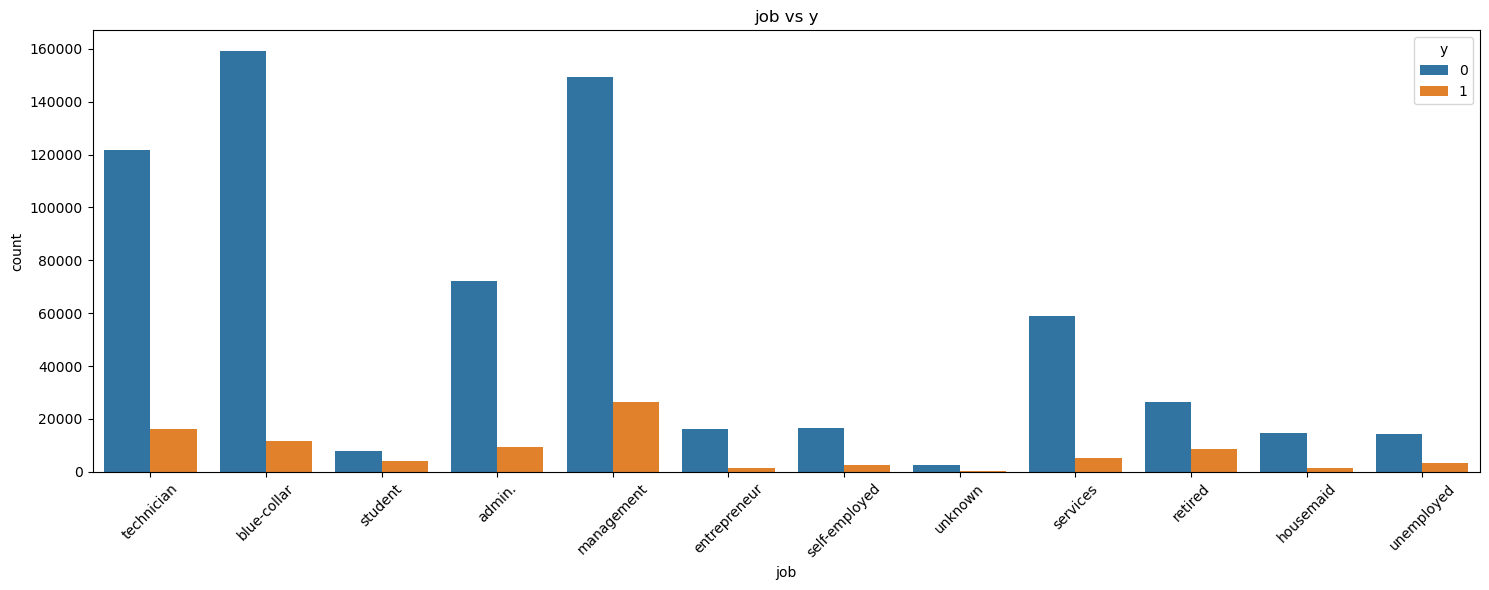

In [25]:
plot_feature_vs_target(df, 'job')

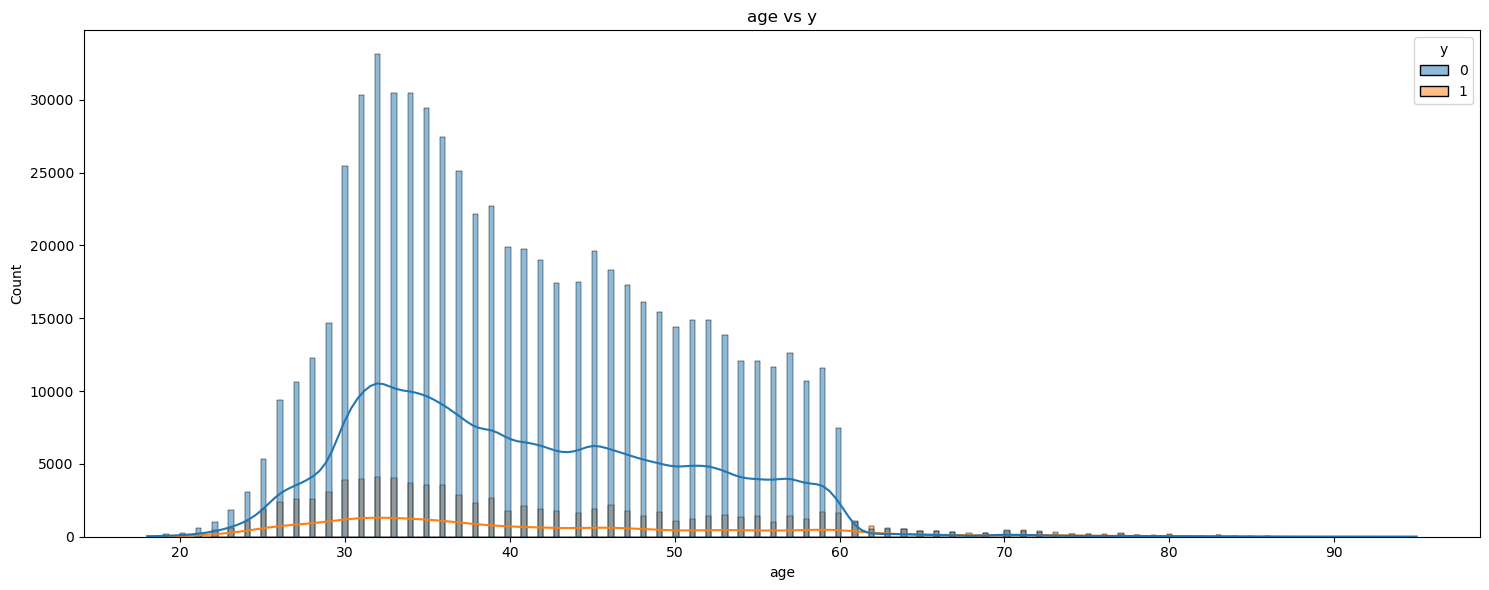

In [26]:
plot_feature_vs_target(df, 'age')

In [27]:
all_cols

{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'was_previously_contacted'}

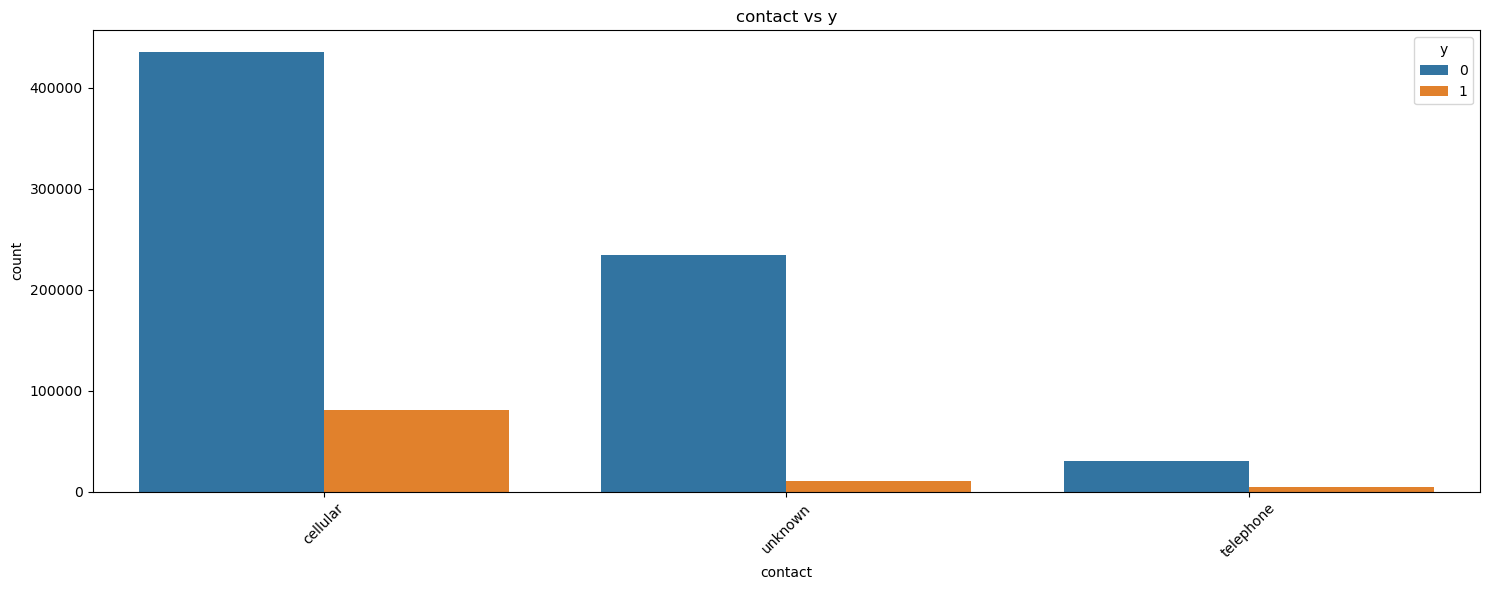

In [28]:
plot_feature_vs_target(df1, 'contact')

In [29]:
for col in df1.columns:
    print(col,' - ', df1[col].dtype)

age  -  int64
job  -  object
marital  -  object
education  -  object
default  -  object
balance  -  int64
housing  -  object
loan  -  object
contact  -  object
day  -  int64
month  -  object
duration  -  int64
campaign  -  int64
pdays  -  int64
previous  -  int64
poutcome  -  object
y  -  int64
was_previously_contacted  -  int8


<Axes: ylabel='campaign'>

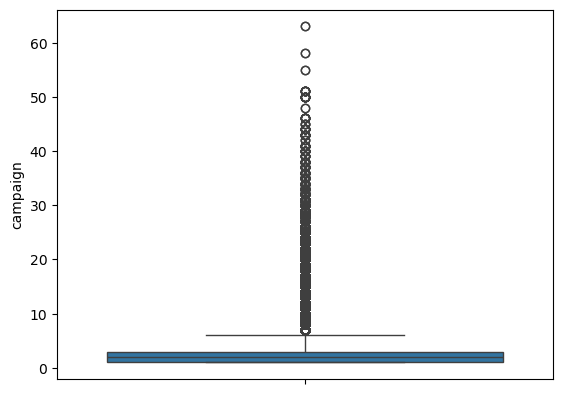

In [30]:
sns.boxplot(df1['campaign'])

In [31]:
def findIQR(col, df):
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    condition = (df[col] >= q25) & (df[col] <= q75)
    filtered = df[condition]
    print(f"{col} -> mid 50% shape: {filtered.shape}, original: {df.shape}")

In [32]:
for col in df1.columns:
    if pd.api.types.is_integer_dtype(df1[col]):
        print('col name - ', col)
        findIQR(col, df1)
        print()

col name -  age
age -> mid 50% shape: (414864, 18), original: (795211, 18)

col name -  balance
balance -> mid 50% shape: (488009, 18), original: (795211, 18)

col name -  day
day -> mid 50% shape: (404046, 18), original: (795211, 18)

col name -  duration
duration -> mid 50% shape: (401498, 18), original: (795211, 18)

col name -  campaign
campaign -> mid 50% shape: (638568, 18), original: (795211, 18)

col name -  pdays
pdays -> mid 50% shape: (709388, 18), original: (795211, 18)

col name -  previous
previous -> mid 50% shape: (709385, 18), original: (795211, 18)

col name -  y
y -> mid 50% shape: (699434, 18), original: (795211, 18)

col name -  was_previously_contacted
was_previously_contacted -> mid 50% shape: (709388, 18), original: (795211, 18)



In [33]:
# job_dummy = pd.get_dummies(df1['job'])
# job_dummy.head()

In [34]:
# for col in set(job_dummy.columns[:-1]):
#     df1[col] = job_dummy[col]
#     print(col, ' - completed', df1.shape)

In [35]:
# def ohe(data:pd.DataFrame, col:str) -> pd.DataFrame:
#     data = data.copy()
#     col_dummy = pd.get_dummies(data[col])
#     print('data shape before - ',data.shape,' categorical cols in ', col, ' - ', col_dummy.shape)
#     for col in col_dummy.columns[:-1]:
#         data[col] = col_dummy[col]
#     print('dataframe size after - ', data.shape)
#     return data

In [36]:
# df2 = ohe(df1, 'marital')

In [37]:
df1.select_dtypes(include='object').columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [38]:
df2 = df1.copy()

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

target_col = 'y'
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X = df2.drop(columns=[target_col])
y = df2[target_col]

X_transformed = model.fit_transform(X)

ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

non_cat_cols = [col for col in X.columns if col not in cat_cols]

all_feature_names = list(cat_feature_names) + non_cat_cols

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

In [40]:
# df3.shape

In [41]:
preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat_cols)

array(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [42]:
X = X_transformed_df
y = df2['y']

In [43]:
X.shape

(795211, 43)

In [44]:
# for col in df2.select_dtypes(include='object').columns.tolist():
#     df2 = ohe(df2, col)

In [45]:
# df3 = df2.drop(df2.select_dtypes(include='object').columns.tolist(), axis=1)

In [46]:
# df3.shape

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,XGBClassifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
xgb_params = {
    'learning_rate': 0.1951339614286697,
    'max_depth': 13,
    'min_child_weight': 14,
    'gamma': 4.586254878038162,
    'subsample': 0.8829082972307842,
    'colsample_bytree': 0.6106352277501341,
    'lambda': 9.976935506747019,
    'alpha': 0.0018063487584367348,
    'scale_pos_weight': 3.6963430205760193,
    'objective': 'binary:logistic',
    'use_label_encoder': False,
    'n_jobs': -1,
    'random_state': 42,
#     'tree_method': 'gpu_hist'
}

In [50]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
print("Test R² Score:", xgb_model.score(X_test, y_test))

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:30:39] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test R² Score: 0.9167835113774262


In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

0.9659880709290171

In [53]:
# !pip install optuna

In [54]:
# !pip install catboost

In [55]:
import optuna

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
study = optuna.create_study(direction='maximize')

[I 2025-08-09 17:30:59,030] A new study created in memory with name: no-name-437a696b-35a1-4baa-8202-81192df55b2e


In [57]:
from catboost import CatBoostClassifier

In [58]:
def objective(trial):
  param = {
      "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
      "depth": trial.suggest_int("depth", 10, 15),
      "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
      "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
      "bootstrap_type": trial.suggest_categorical(
          "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
      ),
#       "task_type": "GPU",
      "iterations": 200,
      "eval_metric": "AUC",
  }
  if param["bootstrap_type"] == "Bayesian":
      param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  elif param["bootstrap_type"] == "Bernoulli":
      param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

  train_x, valid_x, train_y, valid_y = train_test_split(
      X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
  )

  model = CatBoostClassifier(**param)
  model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)],early_stopping_rounds=50, verbose=0)

  preds_proba = model.predict_proba(valid_x)[:, 1]

  auc = roc_auc_score(valid_y, preds_proba)

  return auc

In [59]:
study.optimize(objective, n_trials=50)

[I 2025-08-09 17:31:34,781] Trial 0 finished with value: 0.9619701927023417 and parameters: {'objective': 'Logloss', 'depth': 10, 'colsample_bylevel': 0.09899643532015265, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9619701927023417.
[I 2025-08-09 17:43:21,710] Trial 1 finished with value: 0.9550518796734577 and parameters: {'objective': 'CrossEntropy', 'depth': 15, 'colsample_bylevel': 0.06692335633408086, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7910607751292215}. Best is trial 0 with value: 0.9619701927023417.
[I 2025-08-09 17:45:14,599] Trial 2 finished with value: 0.9577825437789427 and parameters: {'objective': 'Logloss', 'depth': 14, 'colsample_bylevel': 0.037696109990238445, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8765202478961805}. Best is trial 0 with value: 0.9619701927023417.
[I 2025-08-09 17:45:41,168] Trial 3 finished with value: 0.9476303184748938 and parameters: {'ob

[I 2025-08-09 18:49:54,596] Trial 27 finished with value: 0.9585144305996923 and parameters: {'objective': 'Logloss', 'depth': 12, 'colsample_bylevel': 0.09327646113235488, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.335064921744374}. Best is trial 10 with value: 0.9625606858614677.
[I 2025-08-09 18:53:06,154] Trial 28 finished with value: 0.9613900799958154 and parameters: {'objective': 'Logloss', 'depth': 11, 'colsample_bylevel': 0.08071647989287845, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.3519026114479606}. Best is trial 10 with value: 0.9625606858614677.
[I 2025-08-09 18:54:13,112] Trial 29 finished with value: 0.961564020333812 and parameters: {'objective': 'Logloss', 'depth': 10, 'colsample_bylevel': 0.09988062328695467, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 10 with value: 0.9625606858614677.
[I 2025-08-09 18:57:51,833] Trial 30 finished with value: 0.961234596972514 and 

In [60]:
study.best_trial

FrozenTrial(number=10, state=1, values=[0.9625606858614677], datetime_start=datetime.datetime(2025, 8, 9, 17, 58, 35, 175998), datetime_complete=datetime.datetime(2025, 8, 9, 18, 1, 19, 323507), params={'objective': 'Logloss', 'depth': 12, 'colsample_bylevel': 0.09982491421388878, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.4773837412051537}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'objective': CategoricalDistribution(choices=('Logloss', 'CrossEntropy')), 'depth': IntDistribution(high=15, log=False, low=10, step=1), 'colsample_bylevel': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'Bernoulli', 'MVS')), 'bagging_temperature': FloatDistribution(high=10.0, log=False, low=0.0, step=None)}, trial_id=10, value=None)

In [61]:
study.best_params

{'objective': 'Logloss',
 'depth': 12,
 'colsample_bylevel': 0.09982491421388878,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'Bayesian',
 'bagging_temperature': 0.4773837412051537}

In [62]:
study.best_value

0.9625606858614677

In [63]:
# from catboost import CatBoostClassifier

In [64]:
# cat_params = {
#     'learning_rate': 0.1951339614286697,
#     'depth': 13,
#     'min_data_in_leaf': 14,
#     'l2_leaf_reg': 9.976935506747019,
#     'bootstrap_type': 'Bernoulli',
#     'subsample': 0.8829082972307842,
#     'rsm': 0.6106352277501341,
#     'class_weights': [1, 3.6963430205760193],
#     'loss_function': 'Logloss',
#     'verbose': False,
#     'thread_count': -1,
#     'random_seed': 42,
# }

In [65]:
model_cb = CatBoostClassifier(**study.best_params)

In [66]:
model_cb.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    # early_stopping_rounds=50
)

Learning rate set to 0.156096
0:	learn: 0.4732196	test: 0.4730677	best: 0.4730677 (0)	total: 873ms	remaining: 14m 31s
1:	learn: 0.3726019	test: 0.3729797	best: 0.3729797 (1)	total: 2.98s	remaining: 24m 48s
2:	learn: 0.2946646	test: 0.2950120	best: 0.2950120 (2)	total: 5.09s	remaining: 28m 13s
3:	learn: 0.2573131	test: 0.2577482	best: 0.2577482 (3)	total: 6.57s	remaining: 27m 16s
4:	learn: 0.2413684	test: 0.2420641	best: 0.2420641 (4)	total: 8.3s	remaining: 27m 32s
5:	learn: 0.2281987	test: 0.2289822	best: 0.2289822 (5)	total: 9.09s	remaining: 25m 6s
6:	learn: 0.2125862	test: 0.2135610	best: 0.2135610 (6)	total: 11s	remaining: 25m 56s
7:	learn: 0.2049906	test: 0.2060995	best: 0.2060995 (7)	total: 12s	remaining: 24m 45s
8:	learn: 0.2017144	test: 0.2030090	best: 0.2030090 (8)	total: 13.5s	remaining: 24m 46s
9:	learn: 0.1999196	test: 0.2013025	best: 0.2013025 (9)	total: 14s	remaining: 23m 4s
10:	learn: 0.1950812	test: 0.1965960	best: 0.1965960 (10)	total: 15.7s	remaining: 23m 34s
11:	learn

91:	learn: 0.1542146	test: 0.1593565	best: 0.1593565 (91)	total: 1m 44s	remaining: 17m 9s
92:	learn: 0.1542146	test: 0.1593564	best: 0.1593564 (92)	total: 1m 44s	remaining: 16m 59s
93:	learn: 0.1541843	test: 0.1593399	best: 0.1593399 (93)	total: 1m 44s	remaining: 16m 50s
94:	learn: 0.1540909	test: 0.1592589	best: 0.1592589 (94)	total: 1m 45s	remaining: 16m 43s
95:	learn: 0.1540423	test: 0.1592377	best: 0.1592377 (95)	total: 1m 46s	remaining: 16m 40s
96:	learn: 0.1540328	test: 0.1592317	best: 0.1592317 (96)	total: 1m 46s	remaining: 16m 32s
97:	learn: 0.1539844	test: 0.1591865	best: 0.1591865 (97)	total: 1m 48s	remaining: 16m 35s
98:	learn: 0.1539826	test: 0.1591897	best: 0.1591865 (97)	total: 1m 48s	remaining: 16m 27s
99:	learn: 0.1539434	test: 0.1591679	best: 0.1591679 (99)	total: 1m 49s	remaining: 16m 22s
100:	learn: 0.1538869	test: 0.1591180	best: 0.1591180 (100)	total: 1m 49s	remaining: 16m 15s
101:	learn: 0.1538316	test: 0.1590735	best: 0.1590735 (101)	total: 1m 50s	remaining: 16m 

180:	learn: 0.1489097	test: 0.1560310	best: 0.1560310 (180)	total: 2m 53s	remaining: 13m 4s
181:	learn: 0.1488270	test: 0.1559988	best: 0.1559988 (181)	total: 2m 54s	remaining: 13m 6s
182:	learn: 0.1488158	test: 0.1560003	best: 0.1559988 (181)	total: 2m 55s	remaining: 13m 3s
183:	learn: 0.1487836	test: 0.1559875	best: 0.1559875 (183)	total: 2m 55s	remaining: 12m 59s
184:	learn: 0.1487426	test: 0.1559781	best: 0.1559781 (184)	total: 2m 57s	remaining: 13m 1s
185:	learn: 0.1487331	test: 0.1559711	best: 0.1559711 (185)	total: 2m 57s	remaining: 12m 58s
186:	learn: 0.1487280	test: 0.1559691	best: 0.1559691 (186)	total: 2m 58s	remaining: 12m 54s
187:	learn: 0.1483902	test: 0.1558038	best: 0.1558038 (187)	total: 2m 59s	remaining: 12m 55s
188:	learn: 0.1483430	test: 0.1557810	best: 0.1557810 (188)	total: 3m	remaining: 12m 53s
189:	learn: 0.1482650	test: 0.1557753	best: 0.1557753 (189)	total: 3m 1s	remaining: 12m 54s
190:	learn: 0.1482648	test: 0.1557750	best: 0.1557750 (190)	total: 3m 2s	remain

269:	learn: 0.1450888	test: 0.1543517	best: 0.1543517 (269)	total: 4m 15s	remaining: 11m 31s
270:	learn: 0.1450665	test: 0.1543450	best: 0.1543450 (270)	total: 4m 16s	remaining: 11m 29s
271:	learn: 0.1450594	test: 0.1543391	best: 0.1543391 (271)	total: 4m 16s	remaining: 11m 26s
272:	learn: 0.1449665	test: 0.1543282	best: 0.1543282 (272)	total: 4m 18s	remaining: 11m 28s
273:	learn: 0.1449638	test: 0.1543286	best: 0.1543282 (272)	total: 4m 18s	remaining: 11m 25s
274:	learn: 0.1448690	test: 0.1543046	best: 0.1543046 (274)	total: 4m 20s	remaining: 11m 26s
275:	learn: 0.1448634	test: 0.1543042	best: 0.1543042 (275)	total: 4m 20s	remaining: 11m 24s
276:	learn: 0.1448633	test: 0.1543042	best: 0.1543042 (275)	total: 4m 21s	remaining: 11m 21s
277:	learn: 0.1448287	test: 0.1542877	best: 0.1542877 (277)	total: 4m 21s	remaining: 11m 19s
278:	learn: 0.1447800	test: 0.1542519	best: 0.1542519 (278)	total: 4m 22s	remaining: 11m 17s
279:	learn: 0.1447681	test: 0.1542484	best: 0.1542484 (279)	total: 4m 

358:	learn: 0.1424466	test: 0.1535003	best: 0.1535003 (358)	total: 5m 36s	remaining: 10m 1s
359:	learn: 0.1424218	test: 0.1534940	best: 0.1534940 (359)	total: 5m 38s	remaining: 10m 1s
360:	learn: 0.1423790	test: 0.1534758	best: 0.1534758 (360)	total: 5m 39s	remaining: 10m 1s
361:	learn: 0.1423570	test: 0.1534605	best: 0.1534605 (361)	total: 5m 40s	remaining: 9m 59s
362:	learn: 0.1423414	test: 0.1534494	best: 0.1534494 (362)	total: 5m 40s	remaining: 9m 57s
363:	learn: 0.1423411	test: 0.1534487	best: 0.1534487 (363)	total: 5m 40s	remaining: 9m 55s
364:	learn: 0.1423077	test: 0.1534357	best: 0.1534357 (364)	total: 5m 42s	remaining: 9m 55s
365:	learn: 0.1422495	test: 0.1534160	best: 0.1534160 (365)	total: 5m 43s	remaining: 9m 55s
366:	learn: 0.1422487	test: 0.1534182	best: 0.1534160 (365)	total: 5m 43s	remaining: 9m 53s
367:	learn: 0.1422487	test: 0.1534181	best: 0.1534160 (365)	total: 5m 44s	remaining: 9m 51s
368:	learn: 0.1422464	test: 0.1534134	best: 0.1534134 (368)	total: 5m 44s	remain

448:	learn: 0.1406710	test: 0.1528352	best: 0.1528352 (448)	total: 6m 54s	remaining: 8m 28s
449:	learn: 0.1406585	test: 0.1528356	best: 0.1528352 (448)	total: 6m 54s	remaining: 8m 26s
450:	learn: 0.1406584	test: 0.1528358	best: 0.1528352 (448)	total: 6m 55s	remaining: 8m 25s
451:	learn: 0.1406202	test: 0.1528347	best: 0.1528347 (451)	total: 6m 57s	remaining: 8m 26s
452:	learn: 0.1406165	test: 0.1528330	best: 0.1528330 (452)	total: 6m 58s	remaining: 8m 24s
453:	learn: 0.1406092	test: 0.1528271	best: 0.1528271 (453)	total: 6m 58s	remaining: 8m 23s
454:	learn: 0.1405420	test: 0.1528163	best: 0.1528163 (454)	total: 7m	remaining: 8m 23s
455:	learn: 0.1405418	test: 0.1528162	best: 0.1528162 (455)	total: 7m	remaining: 8m 22s
456:	learn: 0.1405329	test: 0.1528182	best: 0.1528162 (455)	total: 7m 1s	remaining: 8m 20s
457:	learn: 0.1405159	test: 0.1528112	best: 0.1528112 (457)	total: 7m 2s	remaining: 8m 19s
458:	learn: 0.1404815	test: 0.1528008	best: 0.1528008 (458)	total: 7m 3s	remaining: 8m 19s

538:	learn: 0.1388820	test: 0.1523831	best: 0.1523831 (538)	total: 8m 13s	remaining: 7m 2s
539:	learn: 0.1387585	test: 0.1523410	best: 0.1523410 (539)	total: 8m 15s	remaining: 7m 1s
540:	learn: 0.1387584	test: 0.1523408	best: 0.1523408 (540)	total: 8m 15s	remaining: 7m
541:	learn: 0.1387556	test: 0.1523420	best: 0.1523408 (540)	total: 8m 16s	remaining: 6m 59s
542:	learn: 0.1387556	test: 0.1523420	best: 0.1523408 (540)	total: 8m 16s	remaining: 6m 57s
543:	learn: 0.1387456	test: 0.1523445	best: 0.1523408 (540)	total: 8m 18s	remaining: 6m 58s
544:	learn: 0.1386944	test: 0.1523376	best: 0.1523376 (544)	total: 8m 20s	remaining: 6m 58s
545:	learn: 0.1386917	test: 0.1523329	best: 0.1523329 (545)	total: 8m 21s	remaining: 6m 56s
546:	learn: 0.1386917	test: 0.1523329	best: 0.1523329 (546)	total: 8m 21s	remaining: 6m 55s
547:	learn: 0.1386641	test: 0.1523253	best: 0.1523253 (547)	total: 8m 22s	remaining: 6m 54s
548:	learn: 0.1386545	test: 0.1523209	best: 0.1523209 (548)	total: 8m 23s	remaining: 6

628:	learn: 0.1372446	test: 0.1519901	best: 0.1519896 (627)	total: 9m 26s	remaining: 5m 33s
629:	learn: 0.1372091	test: 0.1519921	best: 0.1519896 (627)	total: 9m 27s	remaining: 5m 33s
630:	learn: 0.1372059	test: 0.1519930	best: 0.1519896 (627)	total: 9m 28s	remaining: 5m 32s
631:	learn: 0.1371794	test: 0.1519927	best: 0.1519896 (627)	total: 9m 31s	remaining: 5m 32s
632:	learn: 0.1371645	test: 0.1519840	best: 0.1519840 (632)	total: 9m 33s	remaining: 5m 32s
633:	learn: 0.1371471	test: 0.1519900	best: 0.1519840 (632)	total: 9m 34s	remaining: 5m 31s
634:	learn: 0.1371353	test: 0.1519899	best: 0.1519840 (632)	total: 9m 35s	remaining: 5m 30s
635:	learn: 0.1371289	test: 0.1519958	best: 0.1519840 (632)	total: 9m 37s	remaining: 5m 30s
636:	learn: 0.1371280	test: 0.1519957	best: 0.1519840 (632)	total: 9m 37s	remaining: 5m 29s
637:	learn: 0.1371162	test: 0.1519915	best: 0.1519840 (632)	total: 9m 38s	remaining: 5m 28s
638:	learn: 0.1371064	test: 0.1519838	best: 0.1519838 (638)	total: 9m 38s	remain

717:	learn: 0.1358454	test: 0.1517538	best: 0.1517538 (717)	total: 10m 43s	remaining: 4m 12s
718:	learn: 0.1358434	test: 0.1517521	best: 0.1517521 (718)	total: 10m 44s	remaining: 4m 11s
719:	learn: 0.1358433	test: 0.1517518	best: 0.1517518 (719)	total: 10m 44s	remaining: 4m 10s
720:	learn: 0.1358165	test: 0.1517417	best: 0.1517417 (720)	total: 10m 45s	remaining: 4m 9s
721:	learn: 0.1358015	test: 0.1517398	best: 0.1517398 (721)	total: 10m 46s	remaining: 4m 8s
722:	learn: 0.1357875	test: 0.1517334	best: 0.1517334 (722)	total: 10m 46s	remaining: 4m 7s
723:	learn: 0.1357550	test: 0.1517240	best: 0.1517240 (723)	total: 10m 48s	remaining: 4m 7s
724:	learn: 0.1357468	test: 0.1517235	best: 0.1517235 (724)	total: 10m 48s	remaining: 4m 6s
725:	learn: 0.1357112	test: 0.1517265	best: 0.1517235 (724)	total: 10m 50s	remaining: 4m 5s
726:	learn: 0.1357097	test: 0.1517262	best: 0.1517235 (724)	total: 10m 50s	remaining: 4m 4s
727:	learn: 0.1356609	test: 0.1517216	best: 0.1517216 (727)	total: 10m 52s	re

806:	learn: 0.1347973	test: 0.1515948	best: 0.1515948 (806)	total: 11m 43s	remaining: 2m 48s
807:	learn: 0.1347816	test: 0.1515919	best: 0.1515919 (807)	total: 11m 44s	remaining: 2m 47s
808:	learn: 0.1347800	test: 0.1515890	best: 0.1515890 (808)	total: 11m 44s	remaining: 2m 46s
809:	learn: 0.1347756	test: 0.1515896	best: 0.1515890 (808)	total: 11m 46s	remaining: 2m 45s
810:	learn: 0.1347736	test: 0.1515920	best: 0.1515890 (808)	total: 11m 46s	remaining: 2m 44s
811:	learn: 0.1347622	test: 0.1515913	best: 0.1515890 (808)	total: 11m 47s	remaining: 2m 43s
812:	learn: 0.1347413	test: 0.1515854	best: 0.1515854 (812)	total: 11m 47s	remaining: 2m 42s
813:	learn: 0.1346873	test: 0.1515783	best: 0.1515783 (813)	total: 11m 49s	remaining: 2m 42s
814:	learn: 0.1346621	test: 0.1515713	best: 0.1515713 (814)	total: 11m 50s	remaining: 2m 41s
815:	learn: 0.1346511	test: 0.1515710	best: 0.1515710 (815)	total: 11m 51s	remaining: 2m 40s
816:	learn: 0.1346511	test: 0.1515710	best: 0.1515710 (816)	total: 11m

895:	learn: 0.1338062	test: 0.1514886	best: 0.1514749 (891)	total: 12m 46s	remaining: 1m 28s
896:	learn: 0.1338049	test: 0.1514869	best: 0.1514749 (891)	total: 12m 46s	remaining: 1m 28s
897:	learn: 0.1337685	test: 0.1514830	best: 0.1514749 (891)	total: 12m 48s	remaining: 1m 27s
898:	learn: 0.1337670	test: 0.1514801	best: 0.1514749 (891)	total: 12m 48s	remaining: 1m 26s
899:	learn: 0.1337622	test: 0.1514811	best: 0.1514749 (891)	total: 12m 49s	remaining: 1m 25s
900:	learn: 0.1337442	test: 0.1514786	best: 0.1514749 (891)	total: 12m 50s	remaining: 1m 24s
901:	learn: 0.1337183	test: 0.1514723	best: 0.1514723 (901)	total: 12m 52s	remaining: 1m 23s
902:	learn: 0.1337182	test: 0.1514722	best: 0.1514722 (902)	total: 12m 52s	remaining: 1m 23s
903:	learn: 0.1337170	test: 0.1514718	best: 0.1514718 (903)	total: 12m 53s	remaining: 1m 22s
904:	learn: 0.1337065	test: 0.1514690	best: 0.1514690 (904)	total: 12m 54s	remaining: 1m 21s
905:	learn: 0.1337057	test: 0.1514676	best: 0.1514676 (905)	total: 12m

985:	learn: 0.1326672	test: 0.1513788	best: 0.1513788 (984)	total: 14m 7s	remaining: 12s
986:	learn: 0.1326670	test: 0.1513782	best: 0.1513782 (986)	total: 14m 8s	remaining: 11.2s
987:	learn: 0.1325780	test: 0.1513656	best: 0.1513656 (987)	total: 14m 9s	remaining: 10.3s
988:	learn: 0.1325780	test: 0.1513655	best: 0.1513655 (988)	total: 14m 9s	remaining: 9.45s
989:	learn: 0.1325422	test: 0.1513673	best: 0.1513655 (988)	total: 14m 11s	remaining: 8.6s
990:	learn: 0.1325233	test: 0.1513671	best: 0.1513655 (988)	total: 14m 13s	remaining: 7.75s
991:	learn: 0.1325024	test: 0.1513616	best: 0.1513616 (991)	total: 14m 15s	remaining: 6.9s
992:	learn: 0.1324840	test: 0.1513615	best: 0.1513615 (992)	total: 14m 16s	remaining: 6.04s
993:	learn: 0.1324597	test: 0.1513622	best: 0.1513615 (992)	total: 14m 18s	remaining: 5.18s
994:	learn: 0.1324421	test: 0.1513529	best: 0.1513529 (994)	total: 14m 19s	remaining: 4.32s
995:	learn: 0.1323949	test: 0.1513512	best: 0.1513512 (995)	total: 14m 21s	remaining: 3.

In [67]:
model_cb.best_score_

{'learn': {'Logloss': 0.13233922840475257},
 'validation': {'Logloss': 0.1513275049062502}}

In [68]:
model_cb.score(X_test, y_test)

0.9338480788214508

In [69]:
y_pred_proba = model_cb.predict_proba(X_test)[:, 1]
# y_pred = (y_pred_proba >= 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9647


In [70]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score


In [71]:
# print("LR:", roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("RF:", roc_auc_score(y_test, RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("SVC:", roc_auc_score(y_test, SVC(probability=True).fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("XGB:", roc_auc_score(y_test, XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train).predict_proba(X_test)[:, 1]))


In [73]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [74]:
test_df['was_previously_contacted'] = test_df['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [75]:
test_df2 = test_df.drop(columns=['id'])

In [76]:
test_df3 = model.transform(test_df2)

In [77]:
final_df = pd.DataFrame(test_df3, columns=all_feature_names, index=test_df2.index)

In [78]:
final_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,was_previously_contacted
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,32.0,1397.0,21.0,224.0,1.0,-1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,44.0,23.0,3.0,586.0,2.0,-1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,36.0,46.0,13.0,111.0,2.0,-1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58.0,-1380.0,29.0,125.0,1.0,-1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,28.0,1950.0,22.0,181.0,1.0,-1.0,0.0,0.0


In [79]:
model_cb.predict(final_df)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
submission_df = pd.DataFrame({
    'id':test_df['id'],
    'y':model_cb.predict(final_df)
})

In [81]:
submission_df.head()

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0


In [82]:
submission_df.to_csv('submission.csv',index=False)

## At end download the orignal dataset and then test the model on that